In [2]:
import numpy as np
import os,math,random
from matplotlib import pyplot as plt
from scipy.stats import binned_statistic, binned_statistic_2d
from astropy.table import Table, vstack
from astropy.cosmology import FlatLambdaCDM, z_at_value
from astropy import units as u
from astropy.constants import k_B, m_p, G, M_sun
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from gdpyc import GasMap, DustMap
import time
import pandas as pd

In [3]:
ymap = fits.open('../data/ACT/ilc_actplanck_ymap.fits')
masks = fits.open('../data/ACT/wide_mask_GAL070_apod_1.50_deg_wExtended.fits')

In [5]:
masks[0].header['CRPIX1'], masks[0].header['CRPIX2'], \
masks[0].header['CDELT1'], masks[0].header['CDELT2'], \
masks[0].header['CRVAL1'], masks[0].header['CRVAL2'], 

(21601.0, 7561.0, -0.0083333333333333, 0.0083333333333333, 0.0, 0.0)

In [29]:
Cens = Table.read('../data/DESI/CensLite.fits')
Sats = Table.read('../data/DESI/SatsLite.fits')

In [96]:
# Select the groups covered by ACT Map
cennxx = (Cens['RA_X'].data-masks[0].header['CRVAL1'])/masks[0].header['CDELT1']+masks[0].header['CRPIX1']
cennyy = (Cens['DEC_X'].data-masks[0].header['CRVAL2'])/masks[0].header['CDELT2']+masks[0].header['CRPIX2']

cennxx[cennxx<0] = masks[0].header['NAXIS1']+cennxx[cennxx<0]
Cens['xx'] = cennxx.astype('int')
Cens['yy'] = cennyy.astype('int')
Cens = Cens[(Cens['xx']>=0)&(Cens['xx']<masks[0].header['NAXIS1'])&(Cens['yy']>=0)&(Cens['yy']<masks[0].header['NAXIS2'])]
Cens = Cens[masks[0].data.T[Cens['xx'], Cens['yy']]>0]

In [117]:
Cens.write('../data/DESI/CensACT.fits')

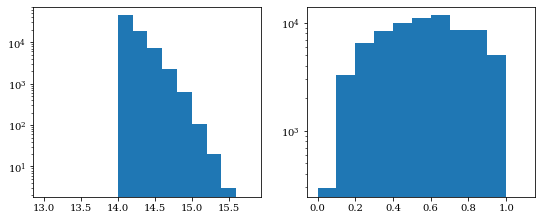

In [89]:
plt.figure(figsize=(9,3.5))
ax1 = plt.subplot(121)
ax1.hist(Cens['logMh'], np.arange(13,16,0.2))
ax1.set_yscale('log')

ax2 = plt.subplot(122)
ax2.hist(Cens['z'], np.arange(0,1.2,0.1))
ax2.set_yscale('log')

In [98]:
min_ra = (0-masks[0].header['CRPIX1'])*masks[0].header['CDELT1']+masks[0].header['CRVAL1']
max_ra = (masks[0].header['NAXIS1']-masks[0].header['CRPIX1'])*masks[0].header['CDELT1']+masks[0].header['CRVAL1']
min_dec = (0-masks[0].header['CRPIX2'])*masks[0].header['CDELT2']+masks[0].header['CRVAL2']
max_dec = (masks[0].header['NAXIS2']-masks[0].header['CRPIX2'])*masks[0].header['CDELT2']+masks[0].header['CRVAL2']

(180.0, -180.0)

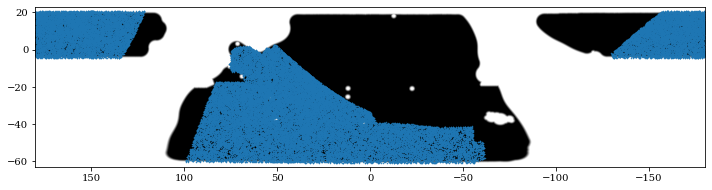

In [115]:
plt.figure(figsize=(12,4))
plt.imshow(masks[0].data, cmap='binary',extent=[min_ra, max_ra, max_dec, min_dec, ])
plt.plot(Cens['RA_X']-360*(Cens['RA_X']>180), Cens['DEC_X'], '.',ms=1)
plt.ylim(min_dec,max_dec)
plt.xlim(180,-180)